In [24]:
import nltk
import pandas as pd
import re
import regex
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF
import string
import gensim 
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('reddit.csv')

### EDA & Data Cleaning 

In [26]:
df.head()
df.drop('Unnamed: 0',axis=1,inplace=True)


In [27]:
#remove empty rows
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [28]:
#check for duplicates 
df[df.duplicated()]

,index,title,post


In [29]:
#URL link removal
removeUrl = lambda x: re.sub('https?:\/\/[\da-z\.-]+\.[a-z\.]{2,6}[^\s]+', "", x)
df['post']=df.post.map(removeUrl)

In [30]:
#text lower and number removal 
df['post']= df['post'].apply(lambda x: x.lower())
remove_num = lambda x: re.sub('\w*\d\w*', ' ', x)
df['post']=df.post.map(remove_num)

In [31]:
# toknize
df['post']=df.post.map(word_tokenize)

In [32]:
#stop word removal + added words 
stopwords = nltk.corpus.stopwords.words('english')
added_words=['would','make','also','get','still','way','like','much','nbsp','think','could','well','feel']
for word in added_words:
    stopwords.append(word)
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['post']=df.post.map(remove_stopwords)

In [33]:

#lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['post']=df['post'].apply(lambda x:lemmatizer(x))

In [34]:
# remvoe punctuation
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))


df['post']=df.post.map(listToString)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['post']=df.post.map(punc_lower)

#removePunc=lambda x:x.translate(str.maketrans('','',string.punctuation))
#df['post']=df.post.map(removePunc)


In [35]:
cv1 = CountVectorizer()
c= cv1.fit_transform(df.post)

In [36]:
pd.DataFrame(c.toarray(), columns=cv1.get_feature_names()).head()
#pd.DataFrame(c.toarray(),index=nba['post'], columns=cv1.get_feature_names()).head()

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cv1.get_feature_names()[0:1000]

['aaa',
 'aaron',
 'aau',
 'ab',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abdel',
 'abducted',
 'abdul',
 'abides',
 'abilities',
 'ability',
 'abit',
 'ablaze',
 'able',
 'above',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absue',
 'absurd',
 'absurdity',
 'absurdly',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abusing',
 'abysmal',
 'academic',
 'acccidentally',
 'accelerate',
 'accent',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessed',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accolade',
 'accommodate',
 'accompany',
 'accomplished',
 'accord',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accumulated',
 'accumulates',
 'accuracy',
 'accurate',
 'accutane',
 'acg',
 'ache',
 'achey',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'achilles',
 'achiuwa',
 'acid',
 'acie',
 'acknowledging',
 'acl',
 'acosta',


### NMF

In [38]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(c)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [39]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2",'component_3','component_4','component_5'],
             columns = cv1.get_feature_names())
topic_word

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
component_1,0.052,0.000,0.000,0.0,0.000,0.002,0.0,0.003,0.000,0.027,...,0.002,0.000,0.0,0.000,0.024,0.000,0.006,0.000,0.000,0.005
component_2,0.000,0.004,0.294,0.0,0.002,0.000,0.0,0.001,0.000,0.001,...,0.008,0.000,0.0,0.006,0.000,0.003,0.001,0.000,0.000,0.001
component_3,0.010,0.000,0.000,0.0,0.000,0.000,0.0,0.001,0.000,0.004,...,0.000,0.000,0.0,0.000,0.000,0.001,0.000,0.000,0.000,0.000
component_4,0.093,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.087,0.0,0.000,0.006,0.000,0.001,0.001,0.001,0.000
component_5,0.004,0.309,0.000,0.0,0.001,0.000,0.0,0.000,0.046,0.000,...,0.001,0.000,0.0,0.000,0.000,0.001,0.000,0.000,0.000,0.001


In [40]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [41]:
display_topics(nmf_model, cv1.get_feature_names(), 30)


Topic  0
game, horizon, forza, series, xsx, racing, best, party, new, time, open, mario, pc, one, critic, xbox, star, fun, world, year, good, title, experience, superstar, content, review, mexico, may, made, play

Topic  1
team, player, nba, jvbl, league, year, school, new, basketball, contract, season, organization, system, play, time, game, one, may, per, ncaa, current, host, feeder, deal, coach, age, draft, idea, best, number

Topic  2
world, game, banjo, character, one, duo, tooie, first, transformation, original, kazooie, mumbo, pad, fight, lot, ability, take, flight, humba, better, section, fps, element, bos, time, moment, new, switch, version, fun

Topic  3
tensei, megami, shin, game, nintendo, switch, combat, jrpg, one, fan, series, star, time, atlus, entry, new, trailer, world, best, story, lot, gameplay, rpg, great, party, franchise, worth, excellent, play, review

Topic  4
team, pf, pt, nba, ast, stl, blk, pm, game, com, min, stats, fg, ft, pg, sf, sg, reb, fgm, ftm, drb, o

In [42]:
#df.to_csv('check1.csv')

coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, \
               id2word = dict_, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=final_reviews,\
         dictionary=dict_, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Text(0, 0.5, 'explained variance ratio')

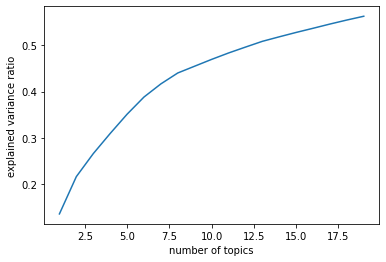

In [43]:
numberOfTopics=[]
explained_v=[]
for n_topics in range(1,20):
    lsa = TruncatedSVD(n_topics)
    doc_topic = lsa.fit_transform(c)
    lsa.explained_variance_ratio_
    numberOfTopics.append(len(lsa.explained_variance_ratio_))
    explained_v.append(sum(lsa.explained_variance_ratio_))
plt.plot(numberOfTopics,explained_v)
plt.xlabel('number of topics')
plt.ylabel('explained variance ratio')

In [44]:
 lsa = TruncatedSVD(7)
doc_topic = lsa.fit_transform(c)


In [45]:
display_topics(lsa, cv1.get_feature_names(), 10)


Topic  0
game, team, player, world, one, nba, new, time, year, horizon

Topic  1
team, nba, player, jvbl, league, school, pf, pt, year, contract

Topic  2
world, banjo, character, duo, tooie, transformation, original, mumbo, kazooie, first

Topic  3
tensei, megami, shin, nintendo, party, switch, combat, jrpg, player, mario

Topic  4
pf, pt, tensei, megami, shin, ast, stl, blk, pm, com

Topic  5
party, mario, superstar, board, minigames, nintendo, nostalgia, pf, new, pt

Topic  6
game, second, dive, rule, overwatch, brigitte, hero, submission, information, shot


In [46]:
sum(lsa.explained_variance_ratio_)

0.4166686786496478